In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load dataset
df = pd.read_csv('card_transdata.csv')
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
# checking for missing values
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [4]:
# checking data types
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


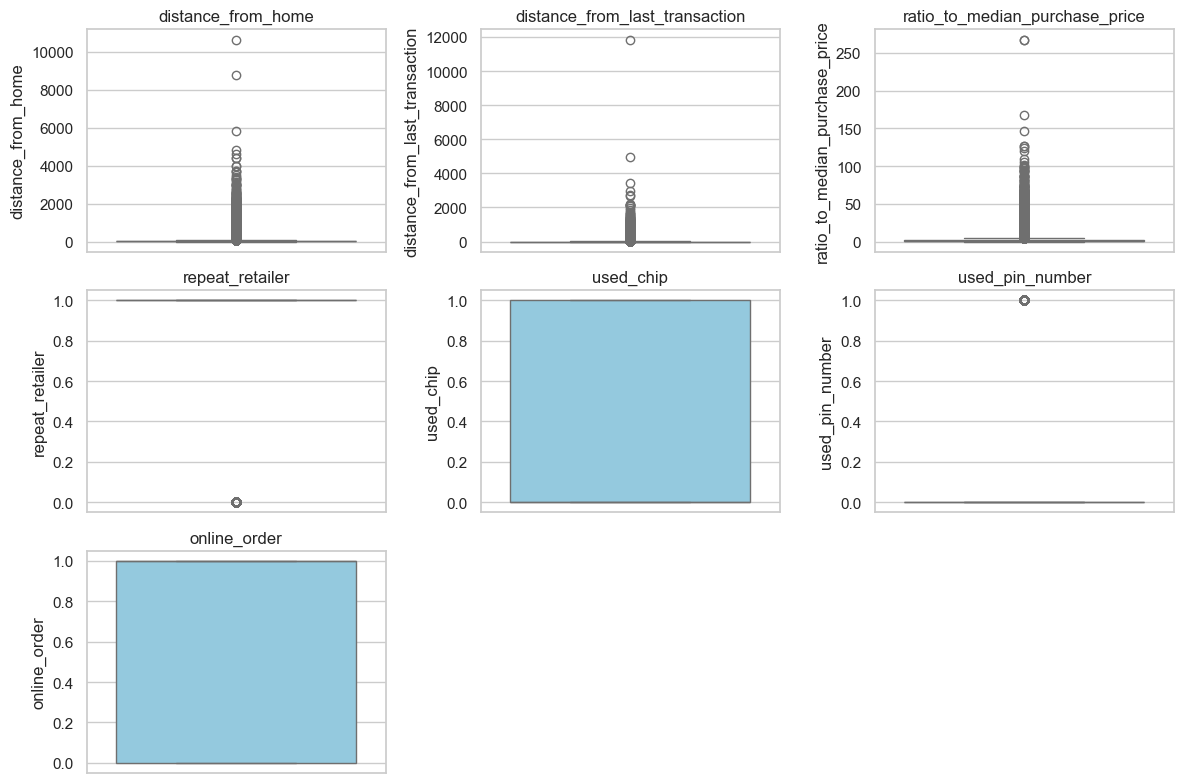

In [6]:
# Creating boxplots for all numerical features

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

for i, column in enumerate(df.columns[:-1]):  
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column], color="skyblue")
    plt.title(column)
    plt.tight_layout()

plt.show()

In [7]:
# Define a function to cap outliers based on IQR
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the values
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return lower_bound, upper_bound

# Apply the capping function to the selected columns
columns_to_cap = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]
capped_ranges = {col: cap_outliers(df, col) for col in columns_to_cap}

# Summarize the capping thresholds
capped_ranges


{'distance_from_home': (-28.920957602736546, 58.54295065212743),
 'distance_from_last_transaction': (-4.291944930383116, 7.944363262531519),
 'ratio_to_median_purchase_price': (-1.9553720889586974, 4.527415677411437)}

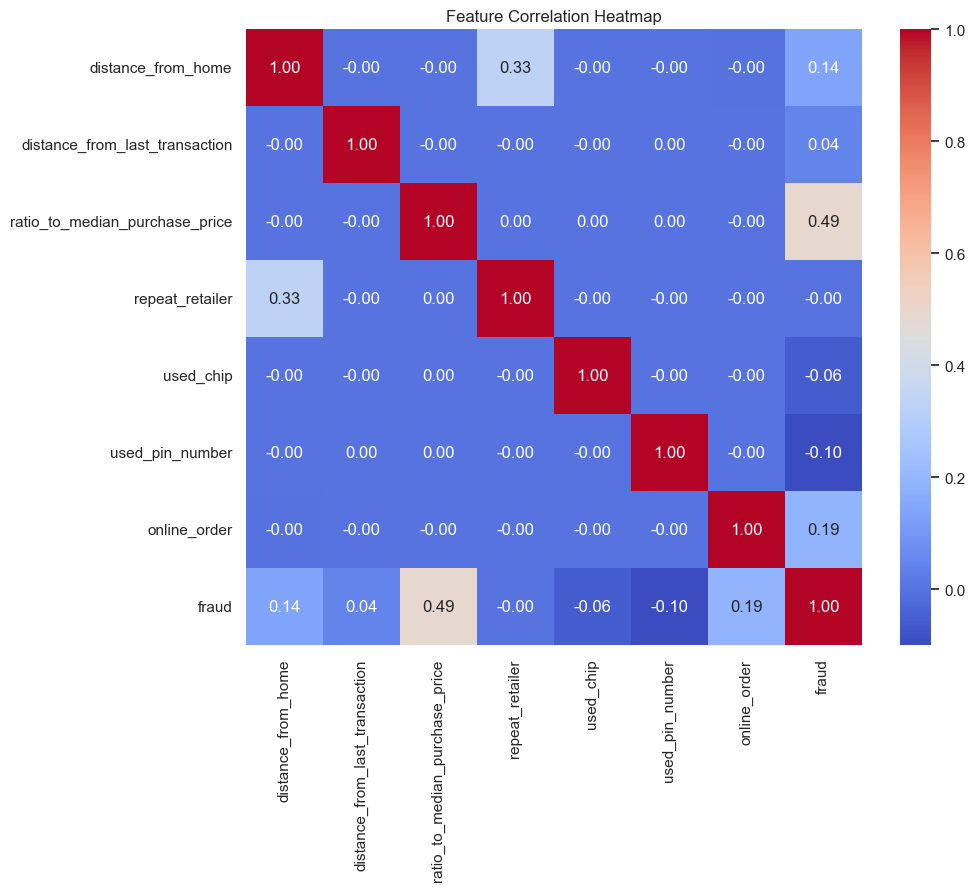

fraud                             1.000000
ratio_to_median_purchase_price    0.492439
online_order                      0.191973
distance_from_home                0.137157
distance_from_last_transaction    0.042250
repeat_retailer                  -0.001357
used_chip                        -0.060975
used_pin_number                  -0.100293
Name: fraud, dtype: float64

In [8]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    cbar=True, 
    square=True
)
plt.title("Feature Correlation Heatmap")
plt.show()

# Correlation of features with the target variable 'fraud'
correlation_with_target = correlation_matrix['fraud'].sort_values(ascending=False)
correlation_with_target

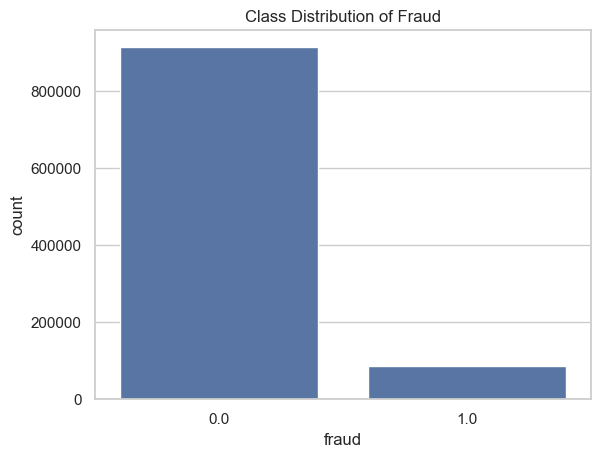

In [9]:
# plot class distribution for the 'fraud' column

sns.countplot(x='fraud', data=df)
plt.title('Class Distribution of Fraud')
plt.show()

In [10]:
# Calculate the ratio of home to last transaction distance
df['home_to_last_ratio'] = df['distance_from_home'] / (df['distance_from_last_transaction'] + 1e-5)


In [11]:
# Combine features to create a transaction score
df['transaction_score'] = df[['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']].sum(axis=1)


In [12]:
# Group purchases into category based on the ratio to median purchase price
df['price_category'] = pd.cut(df['ratio_to_median_purchase_price'], 
                              bins=[0, 0.5, 1, 2, 5, 10], 
                              labels=['very_low', 'low', 'medium', 'high', 'very_high'])


In [13]:
# check the new dataframe
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,home_to_last_ratio,transaction_score,price_category
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,186.012711,2.0,medium
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,61.673406,1.0,medium
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,6.323045,2.0,very_low
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,0.401347,3.0,very_low
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,78.007462,3.0,high


In [14]:
# encoding price_category using the map function
df['price_category'] = df['price_category'].map({'very_low': 0, 
                                                 'low': 1, 
                                                 'medium': 2, 
                                                 'high': 3, 
                                                 'very_high': 4})

In [15]:
# feature separation
x = df.drop(['fraud'], axis=1).values
y = df['fraud']

In [16]:
# train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<Axes: xlabel='fraud', ylabel='count'>

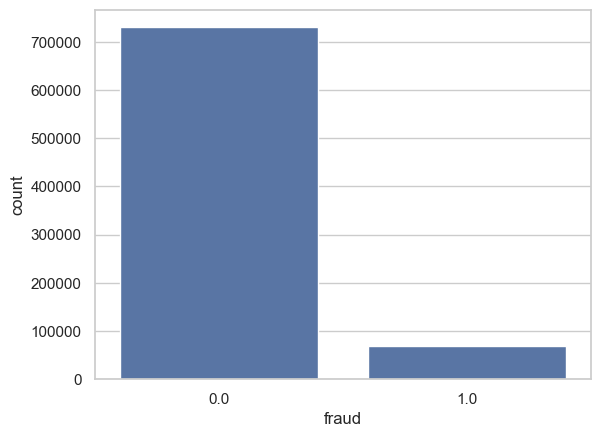

In [17]:
sns.countplot(x=y_train)

<Axes: xlabel='fraud', ylabel='count'>

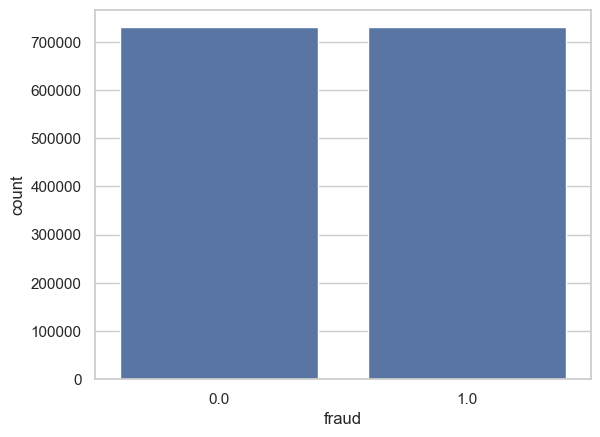

In [18]:
# oversampling the data using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_sp, y_train_sp = smote.fit_resample(x_train, y_train)

# checking distribution after resampling
sns.countplot(x=y_train_sp)

In [19]:
# training our models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(x_train_sp, y_train_sp)
y_pred_lr = lr.predict(x_test)

# model evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.916475
Logistic Regression Confusion Matrix:
 [[166976  15581]
 [  1124  16319]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.91      0.95    182557
         1.0       0.51      0.94      0.66     17443

    accuracy                           0.92    200000
   macro avg       0.75      0.93      0.81    200000
weighted avg       0.95      0.92      0.93    200000



In [20]:
# Random Forest
rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=4, 
    random_state=42
)
rf.fit(x_train_sp, y_train_sp)
y_pred_rf = rf.predict(x_test)

# model evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.942715
Random Forest Confusion Matrix:
 [[171253  11304]
 [   153  17290]]
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    182557
         1.0       0.60      0.99      0.75     17443

    accuracy                           0.94    200000
   macro avg       0.80      0.96      0.86    200000
weighted avg       0.96      0.94      0.95    200000



In [25]:
# Model comparison

# Metrics for Logistic Regression
accuracy_lr = 0.916475
precision_lr_0 = 0.99  
precision_lr_1 = 0.51  
recall_lr_0 = 0.91     
recall_lr_1 = 0.94     
f1_lr_0 = 0.95         
f1_lr_1 = 0.66         
confusion_lr = [[166976, 15581], [1124, 16319]]  

# Metrics for Random Forest
accuracy_rf = 0.942715
precision_rf_0 = 1.00  
precision_rf_1 = 0.60  
recall_rf_0 = 0.94    
recall_rf_1 = 0.99     
f1_rf_0 = 0.97        
f1_rf_1 = 0.75         
confusion_rf = [[171253, 11304], [153, 17290]] 

# Create the updated comparison DataFrame
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_lr, accuracy_rf],
    "Precision (Class 0)": [precision_lr_0, precision_rf_0],
    "Precision (Class 1)": [precision_lr_1, precision_rf_1],
    "Recall (Class 0)": [recall_lr_0, recall_rf_0],
    "Recall (Class 1)": [recall_lr_1, recall_rf_1],
    "F1-Score (Class 0)": [f1_lr_0, f1_rf_0],
    "F1-Score (Class 1)": [f1_lr_1, f1_rf_1],
    "Confusion Matrix[[TN, FP], [FN, TP]]": [confusion_lr, confusion_rf]
})

# Display the DataFrame
comparison_df


,Model,Accuracy,Precision (Class 0),Precision (Class 1),Recall (Class 0),Recall (Class 1),F1-Score (Class 0),F1-Score (Class 1),"Confusion Matrix[[TN, FP], [FN, TP]]"
0,Logistic Regression,0.916475,0.99,0.51,0.91,0.94,0.95,0.66,"[[166976, 15581], [1124, 16319]]"
1,Random Forest,0.942715,1.00,0.60,0.94,0.99,0.97,0.75,"[[171253, 11304], [153, 17290]]"


In [26]:

# Save the random forest model and scaler
import joblib

# Save the Random Forest model and StandardScaler
joblib.dump(rf, 'model.pkl')
joblib.dump(sc, 'scaler.pkl')

print("Random Forest model and StandardScaler saved successfully!")


Random Forest model and StandardScaler saved successfully!
